# Short Introduction to application `matroid`

**This tutorial is also available as a {{ :tutorial:apps_matroid.ipynb |jupyter notebook}} for polymake 3.1.**

This tutorial is meant to show the main features for handling matroids available. To make `matroid` your current application start `polymake` with the option `-A matroid` or use the context switch

    


In [ ]:
application "matroid";


from within the `polymake` shell.  A permanent setting can be stored with `%%set_custom $default_application="matroid";%%`

## Constructing a Simple Matroid and Playing Around

This is how to produce a matroid from a vector configuration.  The matroid is defined by the linear dependence among subsets of these vectors.

    


In [ ]:
$M=new Matroid(VECTORS=>[[1,0,0],[1,0,1],[1,1,0],[1,0,2]]);



If `matroid` is not your default application you have to qualify `Matroid` as in:

    


In [ ]:
$M=new matroid::Matroid(VECTORS=>[[1,0,0],[1,0,1],[1,1,0],[1,0,2]]);



Output of basic statistics.

    


In [ ]:
print $M->N_BASES, " ", $M->N_ELEMENTS, " ", $M->RANK;

3 4 3



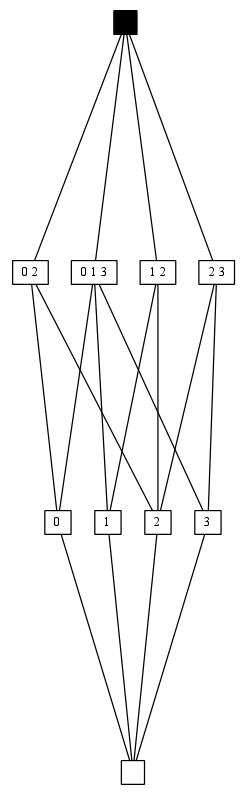
The `VECTORS` are numbered consecutively, starting from zero.  The bases are encoded as sets of these ordinal numbers.

    


In [ ]:
print $M->BASES;

{0 1 2}
{0 2 3}
{1 2 3}




Similarly you can compute the circuits and cocircuits.

    


In [ ]:
print $M->CIRCUITS;

{0 1 3}
    


In [ ]:
print $M->COCIRCUITS;

{2}
{0 1}
{0 3}
{1 3}




You can also compute other properties, like 

    


In [ ]:
print $M->PAVING?"1":"0", " ",
$M->BINARY?"1":"0", " ",
$M->SERIES_PARALLEL?"1":"0", " ",
$M->CONNECTED?"1":"0";

1 1 0 0
    


In [ ]:
print $M->CONNECTED_COMPONENTS;

{0 1 3}
{2}
    


In [ ]:
print $M->TUTTE_POLYNOMIAL;

x*y + y^3 + y^2




Even the lattice of flats could be computed and visualised.

    


In [ ]:
$lattice=$M->LATTICE_OF_FLATS;
foreach (@{$lattice->nodes_of_rank(2)}){print $lattice->FACES->[$_]," "};

{0 2} {0 1 3} {1 2} {2 3}
 


In [ ]:
print $M->MATROID_HYPERPLANES;

{0 1 3}
{0 2}
{1 2}
{2 3}
    


In [ ]:
$M->LATTICE_OF_FLATS->VISUAL;


## Matroid Polytopes

You can construct a polytope from the bases of a matroid as the convex hull of the characteristic vectors of the bases.  This is the *matroid polytope* of that matroid, sometimes also called the *matroid bases polytope*.  The matroid polytope of the matroid `$M` is a subobject `POLYTOPE` of type `polytope::Polytope<Rational>.

    


In [ ]:
print $M->POLYTOPE->VERTICES;

1 1 1 1 0
1 1 0 1 1
1 0 1 1 1
    


In [ ]:
print $M->POLYTOPE->F_VECTOR;

3 3




## Other Constructions

The vertices of a polytope give rise to a matroid.  Here is an example for the vertices of the three-dimensional regular cube.  Notice that point coordinates in the application 'polytope' are given by homogeneous coordinates.  Hence this matroid is defined by the relation of affine dependence.

    


In [ ]:
$C=new Matroid(VECTORS=>polytope::cube(3)->VERTICES);

In [ ]:
print $C->N_BASES;

58




The system also allows you to construct a matroid from a graph.  The bases correspond to the spanning trees then.  Notice that there is more than one way to encode a graph in `polymake`.  Read the [tutorial on graphs](apps_graph) for details.

    


In [ ]:
$G=matroid_from_graph(polytope::cube(3)->GRAPH);

In [ ]:
print $G->N_BASES;

792




It is also possible to derive a new matroid from others. 

    


In [ ]:
# The arguments are two matroids and for each matroid a basepoint. The basepoints will be identified. 
$se=series_extension(uniform_matroid(2,3),0,uniform_matroid(1,3),0);

In [ ]:
print deletion($se,4)->VECTORS;

1 0 0
0 1 0
0 0 1
1 1 1
    


In [ ]:
$pe=parallel_extension(uniform_matroid(1,3),0,uniform_matroid(2,3),0);

In [ ]:
print dual(contraction($pe,4))->VECTORS;

1 0 0
0 1 0
0 0 1
1 1 1
    


In [ ]:
print projective_plane(3)->N_BASES;

234
    


In [ ]:
print fano_matroid()->N_BASES;

28
    


In [ ]:
print direct_sum(projective_plane(3),fano_matroid())->N_BASES," = 234*28";

6552 = 234*28
    


In [ ]:
print two_sum(uniform_matroid(2,4),0,uniform_matroid(2,4),0)->CIRCUITS;

{0 1 2}
{3 4 5}
{0 1 3 4}
{0 1 3 5}
{0 1 4 5}
{0 2 3 4}
{0 2 3 5}
{0 2 4 5}
{1 2 3 4}
{1 2 3 5}
{1 2 4 5}




Of course you can also construct your matroid from scratch by specifying, e.g., its set of bases or non-bases and then compute other properties. The following constructs the Fano matroid, which is the simplest matroid that cannot be constructed from a vector configuration (over a field with a characteristic other than two).

    


In [ ]:
$a=new Array<Set<Int>>([0,1,5],[1,2,6],[0,2,3],[1,3,4],[2,4,5],[3,5,6],[0,4,6]);

In [ ]:
$m=new Matroid(NON_BASES=>$a,N_ELEMENTS=>7);

In [ ]:
print $m->COCIRCUITS;

{0 1 2 4}
{0 1 3 6}
{0 2 5 6}
{0 3 4 5}
{1 2 3 5}
{1 4 5 6}
{2 3 4 6}
    




Note that you have to specify N_ELEMENTS when constructing a matroid in this way because this is not implicit in BASES, etc.
